In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 데이터 불러오기
from google.colab import files
myfile = files.upload()

Saving movies_train.csv to movies_train.csv


In [5]:
import io

train = pd.read_csv(io.BytesIO(myfile['movies_train.csv']))
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
# 문자열인 날짜 정보를 datetime 오브젝트로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 결측값들 0으로 채워주기
train['dir_prev_bfnum'].fillna(0,inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


### 1) 분기별 개봉 영화 수, 평균 관람객 변화 비교

In [9]:
print(train['release_time'].min())
print(train['release_time'].max())

2010-01-02 00:00:00
2015-12-31 00:00:00


In [10]:
train['release_year'] = train['release_time'].dt.year
train['release_quarter'] = train['release_time'].dt.quarter

In [11]:
# 각 연도 분기별 개봉 영화 수
yearqt_movie = train.groupby(['release_year','release_quarter']).size()
print(yearqt_movie)

release_year  release_quarter
2010          1                  16
              2                  24
              3                  25
              4                  25
2011          1                  23
              2                  13
              3                  23
              4                  21
2012          1                  22
              2                  20
              3                  25
              4                  21
2013          1                  15
              2                  22
              3                  27
              4                  31
2014          1                  24
              2                  30
              3                  32
              4                  41
2015          1                  22
              2                  24
              3                  32
              4                  42
dtype: int64


In [12]:
# 각 연도 분기별 평균 영화 관람객 수 
yearqt_num = train['box_off_num'].groupby([train['release_year'], train['release_quarter']]).mean()
print(yearqt_num)

release_year  release_quarter
2010          1                  1.924501e+05
              2                  3.466838e+05
              3                  8.288438e+05
              4                  6.651411e+05
2011          1                  5.591162e+05
              2                  7.026480e+05
              3                  8.944767e+05
              4                  3.686814e+05
2012          1                  9.146262e+05
              2                  5.529920e+05
              3                  1.547894e+06
              4                  6.354694e+05
2013          1                  1.621999e+06
              2                  6.459955e+05
              3                  1.269269e+06
              4                  7.382853e+05
2014          1                  6.557694e+05
              2                  3.107731e+05
              3                  6.286500e+05
              4                  7.376798e+05
2015          1                  5.426415e+05
    

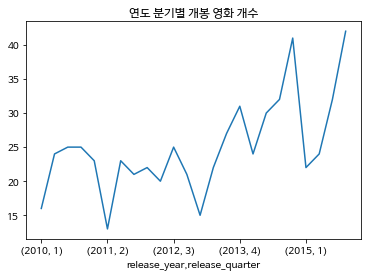

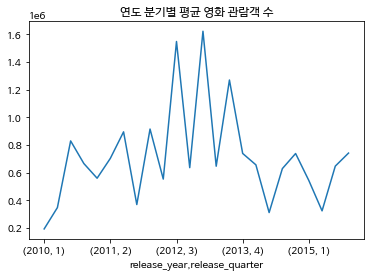

In [13]:
# 연도 분기별 두 수치를 그래프로 비교
fig, ax = plt.subplots()
ax = yearqt_movie.plot()
ax.set_title('연도 분기별 개봉 영화 개수')
plt.show()

fig, ax = plt.subplots()
ax = yearqt_num.plot()
ax.set_title('연도 분기별 평균 영화 관람객 수')
plt.show()

- 2010년 1분기부터 2015년 4분기까지 개봉하는 영화 개수는 시간이 흐를수록 대체로 증가한다. 매년 1~2분기에 영화 개수가 급락하지만 전체적으로는 증가하는 추세이다.
- 하지만 개봉 영화 개수와 평균 관람객 수는 비례하지 않는다. 2012년 3분기부터 2013년 4분기까지의 기간은 타 기간에 비해 평균 관람객 수가 높지만, 개봉 영화 개수는 많지 않은 편이다.

Text(0, 0.5, '평균 관람객 수')

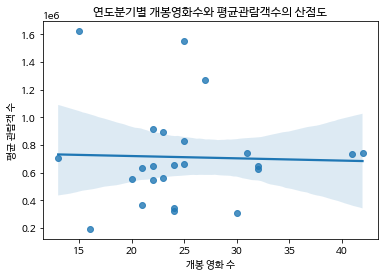

In [33]:
yearqt_df = pd.DataFrame({'movie':yearqt_movie, 'num':yearqt_num})

ax = plt.subplots()
ax = sns.regplot(x='movie', y='num', data=yearqt_df)
ax.set_title('연도분기별 개봉영화수와 평균관람객수의 산점도')
ax.set_xlabel('개봉 영화 수')
ax.set_ylabel('평균 관람객 수')

- 산점도를 통해 영화가 많이 개봉하는 시즌이라고 영화 평균 이용객이 늘어나진 않는다는 것을 볼 수 있다. 산점도에서 특정한 비례 관계나 특징을 찾을 수 없다.

### 2) 요일별 평균 영화 개봉 수와 평균 관람객 수 

In [15]:
# release_weekday 열의 데이터가 숫자로 구분되어 있어서 어느 요일인지 식별하기 힘듦. 따라서 문자로 바꿈.

train['release_weekday'] = train['release_time'].dt.weekday

t = ['월','화','수','목','금','토','일']
for i in range(600):
  n = train['release_weekday'][i]
  train['release_weekday'][i] = t[n]

print(train['release_weekday'])

0      목
1      목
2      수
3      목
4      목
      ..
595    수
596    목
597    목
598    목
599    수
Name: release_weekday, Length: 600, dtype: object


In [16]:
# 요일별 개봉 영화 수
weekd_movie = train.groupby('release_weekday').size().sort_values(ascending=False)
print('요일별 개봉 영화 수:')
print(weekd_movie)

# 개봉 요일별 평균 영화 관람객 수 
weekd_num = train['box_off_num'].groupby(train['release_weekday']).mean().sort_values(ascending=False)
print('\n', '개봉 요일별 평균 영화 관람객 수:')
print(weekd_num)

요일별 개봉 영화 수:
release_weekday
목    484
수    107
월      4
화      2
금      2
토      1
dtype: int64

 개봉 요일별 평균 영화 관람객 수:
release_weekday
화    2.591569e+06
수    2.237699e+06
목    3.722990e+05
금    4.865100e+04
월    4.340000e+02
토    3.530000e+02
Name: box_off_num, dtype: float64


In [17]:
train[train['release_weekday']=='화']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_quarter,release_weekday
288,타워,CJ E&M 영화부문,드라마,2012-12-25,121,12세 관람가,김지훈,2849087.5,4,126,3,5181014,2012,4,화
302,원 나잇 스탠드,KT&G 상상마당,드라마,2010-05-04,98,청소년 관람불가,민용근,0.0,0,106,10,2124,2010,2,화


- 요일별 개봉 영화 수는 목, 수, 월, 화, 금, 토요일의 순서대로 많다. 영화 개봉일은 대부분 목요일임을 알 수 있다. 수, 목요일에 대부분의 영화가 개봉하고, 월, 화, 금, 토요일은 아주 적은 수의 영화가 개봉한다. 일요일은 영화가 개봉하지 않았다.
- 영화의 개별 요일별 평균 관람객 수는 화, 수, 목, 금, 월, 토요일 순으로 많다. 요일별 개봉 영화 수의 순서와는 다르지만, 그렇다고 개봉 요일과 평균 관람객 수가 아예 관련 없다고 볼 수는 없다. 영화의 평균 관람객 수가 가장 많은 화요일에는 영화가 두 편 개봉했는데, 그 중 하나의 관람객 수가 매우 컸기 때문에 그것의 평균을 일반화할 수 없다. 
- 요일별 자료 개수의 차이가 매우 크므로 평균 영화 관람객 수를 비교하는데 의미가 없을 것 같다고 판단한다. 따라서 두 결과 중 '요일별 개봉 영화 수'를 통해 수, 목요일에 영화를 많이 개봉하는 경향성이 있다는 사실만 알 수 있다.

### 3) 배급사별 분석

배급사별로 개봉 영화 수(dist_num), 평균 영화 관람객 수(dist_box), 평균 주연배우 수(dist_actor), 평균 스탭 수(dist_staff), 감독의 이전 제작 영화 평균 개수(dist_prev_num), 감독의 이전 제작 영화 평균 관객 수(dist_prev_bf)까지 6부분을 분석해 하나의 데이터 프레임(dist_df)을 생성하고, 이를 시각화해서 배급사별 영화 개봉 성과, 선호하는 스태프 인원, 선호하는 감독 등을 알아보려 한다.

In [18]:
# 배급사별 개봉 영화 개수
dist_num = train.groupby('distributor').size()
dist_num.sort_values(ascending=False)

distributor
CJ 엔터테인먼트          54
롯데엔터테인먼트           52
(주)NEW             30
(주)마운틴픽쳐스          29
인디스토리              26
                   ..
동국대학교 충무로영상제작센터     1
두 엔터테인먼트            1
와이드릴리즈(주)           1
와이드 릴리즈(주)          1
마법사필름               1
Length: 169, dtype: int64

In [19]:
# 배급사별 평균 영화 관람객 수
dist_box = train['box_off_num'].groupby(train['distributor']).mean()
dist_box.sort_values(ascending=False)

distributor
CJ E&M Pictures    4.122337e+06
(주)쇼박스             3.386656e+06
(주)아이필름코퍼레이션       3.117859e+06
쇼박스(주)미디어플렉스       2.634823e+06
영구아트무비             2.541603e+06
                       ...     
나우콘텐츠              5.400000e+01
위드시네마              4.600000e+01
사람과 사람들            4.200000e+01
고구마공작소             8.000000e+00
인피니티엔터테인먼트         2.000000e+00
Name: box_off_num, Length: 169, dtype: float64

In [21]:
# 배급사별 평균 주연배우 수
dist_actor = train['num_actor'].groupby(train['distributor']).mean().sort_values(ascending=False)
dist_actor

distributor
디 씨드              11.0
서울독립영화제            9.5
파이오니아21            8.0
더픽쳐스/(주)마운틴픽쳐스     8.0
크리에이티브컴즈(주)        8.0
                  ... 
미라클 필름             1.0
(주)콘텐츠 윙           1.0
인터콘미디어             0.0
(주)패뷸러스            0.0
상구네 필름             0.0
Name: num_actor, Length: 169, dtype: float64

In [22]:
# 배급사별 평균 스탭 수
dist_staff = train['num_staff'].groupby(train['distributor']).mean().sort_values(ascending=False)
dist_staff

distributor
주머니필름           477.0
(주)아이필름코퍼레이션    458.0
스튜디오 블루         436.0
SK텔레콤(주)        410.0
KT              364.0
                ...  
위드시네마             0.0
에이원 엔터테인먼트        0.0
미라클 필름            0.0
나우콘텐츠             0.0
(주)콘텐츠 윙          0.0
Name: num_staff, Length: 169, dtype: float64

In [23]:
# 감독의 이전 제작 영화 평균 개수
dist_prev_num = train['dir_prev_num'].groupby(train['distributor']).mean().sort_values(ascending=False)
dist_prev_num

distributor
조이앤컨텐츠그룹    3.0
판씨네마(주)     3.0
새인컴퍼니       3.0
OAL(올)      3.0
tvN         3.0
           ... 
어썸 피플       0.0
아방가르드 필름    0.0
SK텔레콤(주)    0.0
SK플래닛       0.0
마법사필름       0.0
Name: dir_prev_num, Length: 169, dtype: float64

In [44]:
# 감독의 이전 제작 영화 평균 관객수
dist_prev_bf = train['dir_prev_bfnum'].groupby(train['distributor']).mean().sort_values(ascending=False)
dist_prev_bf

distributor
고구마공작소             1.761531e+07
영구아트무비             7.855474e+06
CJ E&M Pictures    4.111671e+06
스튜디오후크             2.800018e+06
CJ E&M 영화부문        2.163222e+06
                       ...     
KBS미디어(주)          0.000000e+00
싸이더스 FNH           0.000000e+00
스튜디오 느림보           0.000000e+00
M2픽처스              0.000000e+00
마법사필름              0.000000e+00
Name: dir_prev_bfnum, Length: 169, dtype: float64

In [45]:
# 위 시리즈들을 데이터 프레임 dist_df로 합침
dist_df = pd.DataFrame({'num':dist_num, 'box':dist_box, 'actor':dist_actor, 'staff':dist_staff,'prev_num':dist_prev_num, 'prev_bf':dist_prev_bf})

Text(0, 0.5, '영화 평균 관람객 수')

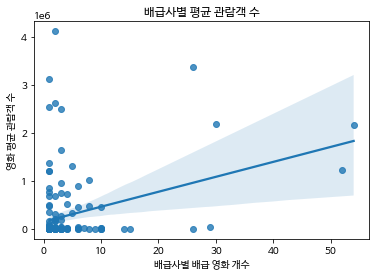

In [50]:
# 배급사별 성과 비교
ax = plt.subplots()
ax = sns.regplot(x='num', y='box', data=dist_df)
ax.set_title('배급사별 평균 관람객 수')
ax.set_xlabel('배급사별 배급 영화 개수')
ax.set_ylabel('영화 평균 관람객 수')

- x축의 오른쪽으로 갈수록 배급 영화 개수가 많다. x가 20 이상인 6개의 점들은 배급 영화수 Top6 배급사들을 뜻한다.
- 그래프에서 약간 우상향인 회귀 곡선을 볼 수 있지만 큰 관계가 없다고 볼 수 있다. 배급하는 영화 개수가 많은 배급사가 무조건 평균 관람객 수도 높은 것은 아니다.

Text(0, 0.5, '평균 스탭 수')

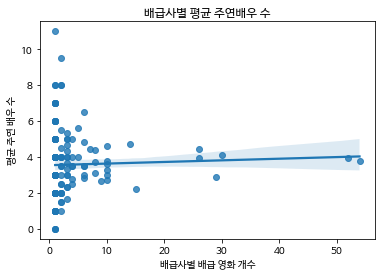

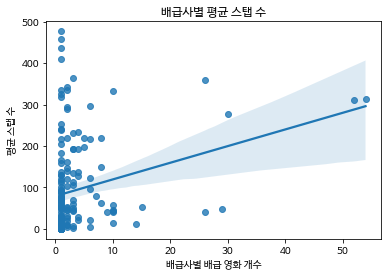

In [59]:
# 배급사별 주연배우 수, 스태프 비교

ax1 = plt.subplots()
ax1 = sns.regplot(x='num', y='actor', data=dist_df)
ax1.set_title('배급사별 평균 주연배우 수')
ax1.set_xlabel('배급사별 배급 영화 개수')
ax1.set_ylabel('평균 주연 배우 수')

ax2 = plt.subplots()
ax2 = sns.regplot(x='num', y='staff', data=dist_df)
ax2.set_title('배급사별 평균 스탭 수')
ax2.set_xlabel('배급사별 배급 영화 개수')
ax2.set_ylabel('평균 스탭 수')

- x축의 오른쪽으로 갈수록 배급 영화 개수가 많다. x가 20 이상인 6개의 점들은 배급 영화수 Top6 배급사들을 뜻한다.
- 주연배우 수는 배급사에 관계 없이 다양하다. Top6 배급사의 평균 주연배우 수가 약 4명인 것을 볼 때, Top6 배급사들은 주연배우는 4명 정도를 선호한다는 것을 알 수 있다.
- 배급사별 스탭 수는 그래프에서 약간의 우상향 회귀 곡선을 띄고 있지만 점의 위치들을 통해 큰 관계가 있다고는 볼 수 없고 매우 다양하다. Top2 배급사들은 평균 스탭 수가 많은 편이라고 할 수 있다.

Text(0, 0.5, '감독들의 평균 이전 영화 관객수')

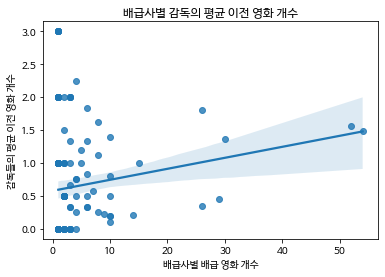

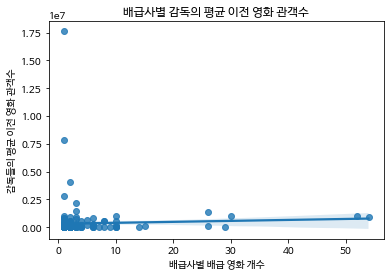

In [60]:
# 배급사는 어떤 감독을 선호하는가 (감독의 이전 영화 개수, 관객수)

ax1 = plt.subplots()
ax1 = sns.regplot(x='num', y='prev_num', data=dist_df)
ax1.set_title('배급사별 감독의 평균 이전 영화 개수')
ax1.set_xlabel('배급사별 배급 영화 개수')
ax1.set_ylabel('감독들의 평균 이전 영화 개수')

ax2 = plt.subplots()
ax2 = sns.regplot(x='num', y='prev_bf', data=dist_df)
ax2.set_title('배급사별 감독의 평균 이전 영화 관객수')
ax2.set_xlabel('배급사별 배급 영화 개수')
ax2.set_ylabel('감독들의 평균 이전 영화 관객수')

- x축의 오른쪽으로 갈수록 배급 영화 개수가 많다. x가 20 이상인 6개의 점들은 배급 영화수 Top6 배급사들을 뜻한다.
- 감독들의 이전 영화 개수는 평균적으로 0개에서 3개까지 나타난다. 그래프에서 약간의 우상향 회귀선을 띄지만 점들의 위치가 매우 다양하다. Top6 배급사들의 위치도 다양하다. 따라서 감독의 이전 제작 영화 개수는 배급사의 영화 배급 여부에 조금은 영향을 줄 수 있지만 그 영향이 크지 않다고 볼 수 있다. 
- 감독들의 이전 영화의 평균 관객수 그래프는 어느 배급사이건 별 차이가 없다.따라서 감독들의 이전 영화 평균 관객수는 배급사의 배급 여부에 영향을 끼치는 요인이라고 할 수 없다.  

### 4) 이외의 분석

Text(0, 0.5, '스탭 수')

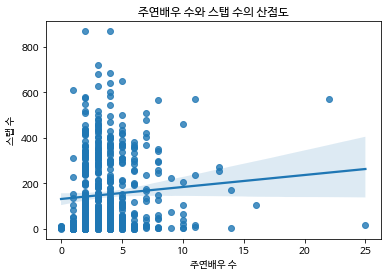

In [38]:
# 주연배우 수와 스탭 수의 관계
ax = plt.subplots()
ax = sns.regplot(train['num_actor'], train['num_staff'])
ax.set_title('주연배우 수와 스탭 수의 산점도')
ax.set_xlabel('주연배우 수')
ax.set_ylabel('스탭 수')

- 위 그래프에선 아주 약간의 우상향 회귀선이 나타난다. 주연배우의 수와 스탭 수 사이에는 특정한 관계가 없다고 볼 수 있다.

Text(0, 0.5, '다음 영화의 관객수')

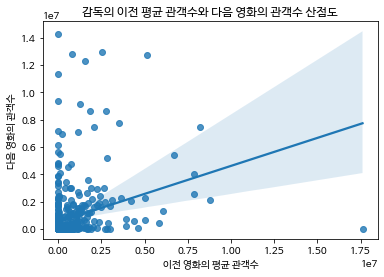

In [40]:
# 이전 제작 영화에서의 평균 관객수가 높은 감독은 다음 영화의 관객수도 많을까?
ax = plt.subplots()
ax = sns.regplot(train['dir_prev_bfnum'], train['box_off_num'])
ax.set_title('감독의 이전 평균 관객수와 다음 영화의 관객수 산점도')
ax.set_xlabel('이전 영화의 평균 관객수')
ax.set_ylabel('다음 영화의 관객수')

- 위 그래프에서 x=0인 값들은 이전 영화가 없는 신인 감독들의 데이터이다. 따라서 해당 데이터들은 고려에서 제외한다.
- 회귀곡선은 약간 우상향이지만, 점들의 위치를 봤을 때 이전 평균 관객수와 다음 영화의 관객수가 비례한다고 말할 수 없다. 